In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
online = pd.read_csv('OnlineNewsPopularity.csv')
online.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Data Ingestion

In [3]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [4]:
online.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

We have performed online.info() to check for nullvalues. Even online.isnull().sum() to check if there are any null values. We found out that there are no null values.The data set is free from null values.

In [5]:
online.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Through descriptive statistics we can check the skewness of the data along with mean,median,quantiles(25th,50th and 75th) and standard deviation.

From describe() we have observed that the columns are skewed by observing the mean and median. 

If the mean is close to median, then the data is normally distriubuted.

If mean is greater than median then, the data is said to be right skewed.

If mean is lesser than median then, the data is said to be left skewed.

Standard Deviation tells us about the amount of variability in each column.

# Transformation of Target Variable

In [6]:
x = online[' shares'].mean()
x

3395.3801836343455

In Transformation of Target Variable, we are converting the target variables into 2 classes based on mean. If Share value is below mean, it is classified as 0 and if the share value is above means, it is classified as 1

In [7]:
share_label = list()
for shares in online[' shares']:
    if shares <= x:
        share_label.append(0)
    else:
        share_label.append(1)

In [8]:
# Update this class label into the dataframe
online = pd.concat([online, pd.DataFrame(share_label, columns=['share_label'])], axis=1)
online.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_label
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [9]:
online['share_label'].value_counts()

0    31565
1     8079
Name: share_label, dtype: int64

In [10]:
X = online.drop([' shares','share_label','url'],axis=1)
y = online['share_label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_reg = LogisticRegression()
model = log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [12]:
print('Training Accuracy Score : ',log_reg.score(X_train,y_train))
print('Testing Accuracy Score : ',accuracy_score(y_test,y_pred))

Training Accuracy Score :  0.7967567567567567
Testing Accuracy Score :  0.7939297124600639


The Training accuracy score is 0.7967 and testing accuracy score is 0.7939. Thus, the model is over fitting since Train accuracy is more than the test accuracy

# Building a base model

In [13]:
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)
model = sm.Logit(y_train,X_train_c).fit()
model.summary()

         Current function value: 0.468433
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            share_label   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27693
Method:                           MLE   Df Model:                           56
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.07153
Time:                        12:44:57   Log-Likelihood:                -12999.
converged:                      False   LL-Null:                       -14000.
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -441.8699   1.01e+06     -0.000      1.000   -1.98e+06    1.98e+06
 timedelta                         0.0007      0.000      6.252      0.000       0.000       0.001
 n_tokens_title                    0.0215      0.008      2.740      0.006       0.006       0.037
 n_tokens_content                8.23e-05   5.71e-05      1.441      0.150   -2.97e-05       0.000
 n_unique_tokens                   0.1387      0.506      0.274      0.784      -0.852       1.129
 n_non_stop_words                  0.4109      2.015      0.204      0.838      -3.538       4.359
 n_non_stop_unique_tokens          0.0029      0.428      0.007      0.995      -0.835       0.841
 num_hrefs                         0.0072      0.002      4.376      0.000       0.004       0.010
 num_self_hrefs                   -0.0246      0.005     -5.212      0.000      -0.034      -0.015
 num_imgs                          0.0071      0.002      3.200      0.001       0.003       0.011
 num_videos                        0.0067      0.004      1.787      0.074      -0.001       0.014
 average_token_length             -0.2351      0.065     -3.611      0.000      -0.363      -0.108
 num_keywords                      0.0476      0.010      4.727      0.000       0.028       0.067
 data_channel_is_lifestyle        -0.1474      0.098     -1.503      0.133      -0.340       0.045
 data_channel_is_entertainment    -0.2691      0.065     -4.128      0.000      -0.397      -0.141
 data_channel_is_bus              -0.4614      0.098     -4.698      0.000      -0.654      -0.269
 data_channel_is_socmed            0.3218      0.091      3.543      0.000       0.144       0.500
 data_channel_is_tech              0.2609      0.095      2.759      0.006       0.076       0.446
 data_channel_is_world            -0.0432      0.101     -0.427      0.669      -0.241       0.155
 kw_min_min                        0.0006      0.000      1.406      0.160      -0.000       0.001
 kw_max_min                     3.927e-05   1.54e-05      2.550      0.011    9.09e-06    6.95e-05
 kw_avg_min                       -0.0003   8.95e-05     -3.730      0.000      -0.001      -0.000
 kw_min_max                     -7.95e-07   3.42e-07     -2.326      0.020   -1.46e-06   -1.25e-07
 kw_max_max                     1.391e-08   1.58e-07      0.088      0.930   -2.95e-07    3.23e-07
 kw_avg_max                    -3.533e-07   2.21e-07     -1.601      0.109   -7.86e-07    7.92e-08
 kw_min_avg                       -0.0001   1.95e-05     -5.321      0.000      -0.000   -6.55e-05
 kw_max_avg                    -9.011e-05      7e-06    -12.880      0.000      -0.000   -7.64e-05
 kw_avg_avg                        0.0007   3.93e-05     17.655      0.000       0.001       0.001
 self_reference_min_shares      2.107e-06    1.8e-06      1.172      0.241   -1.42e-06    5.63e-06
 self_reference_max_shares      4.116e-07   9.11e-07      0.452      0.65

In [14]:
y_prob = model.predict(X_test_c)
y_prob.head()

32340    0.104019
10480    0.200081
15370    0.281589
31592    0.096360
198      0.128024
dtype: float64

In [15]:
y_test = pd.DataFrame(y_test)
y_test['prob'] = y_prob

In [16]:
y_test['y_pred'] = y_test['prob'].apply(lambda x:1 if x>=0.1 else 0)
y_test.head()

,share_label,prob,y_pred
32340,0,0.104019,1
10480,0,0.200081,1
15370,1,0.281589,1
31592,0,0.096360,0
198,0,0.128024,1


In [17]:
cm = confusion_matrix(y_test['share_label'],y_test['y_pred'])
cm

array([[1749, 7699],
       [ 141, 2305]], dtype=int64)

In [18]:
fpr,tpr,threshold = roc_curve(y_test['share_label'],y_test['prob'])

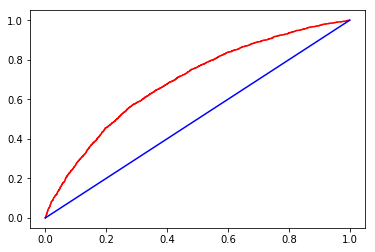

In [19]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [20]:
roc_auc_score(y_test['share_label'],y_test['prob'])

0.6909472376403992

In [21]:
print('Precison Score:',metrics.precision_score(y_test['share_label'],y_test['y_pred']))
print('Recall Score or True Positive Rate : ',metrics.recall_score(y_test['share_label'], y_test['y_pred']))

Precison Score: 0.2304078368652539
Recall Score or True Positive Rate :  0.9423548650858544


We can observe that ROC ACCURACY SCORE is 0.69, which is low.

Precision score is 0.23 which is less. Precision means than an algorithm returned substancially relevant than irrelevant one

Recall score is 0.94, which is high. Recall means it returned most relevant values

# Outliers Detection 

 timedelta box plot


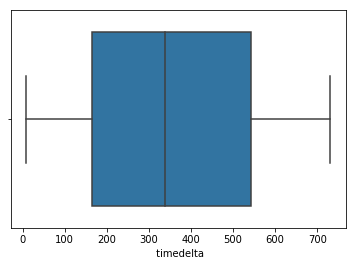

 n_tokens_title box plot


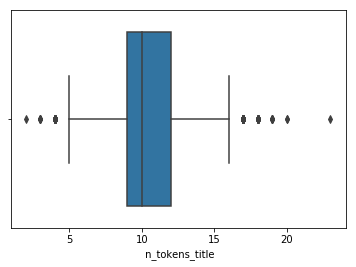

 n_tokens_content box plot


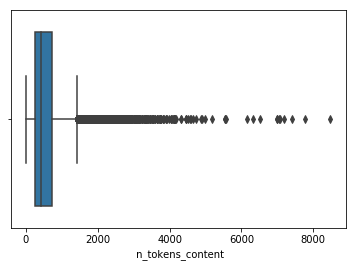

 n_unique_tokens box plot


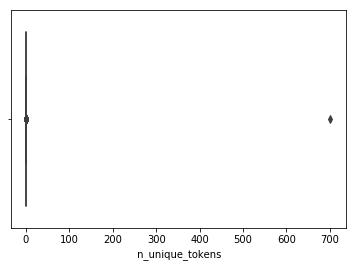

 n_non_stop_words box plot


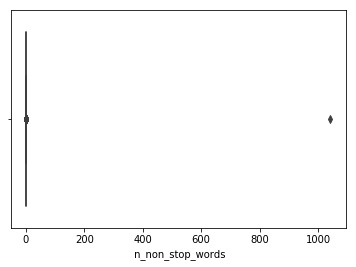

 n_non_stop_unique_tokens box plot


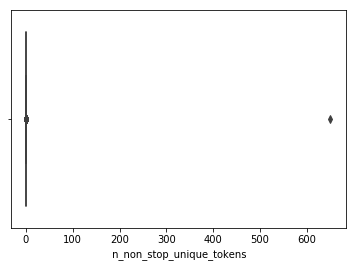

 num_hrefs box plot


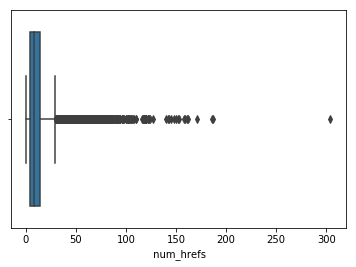

 num_self_hrefs box plot


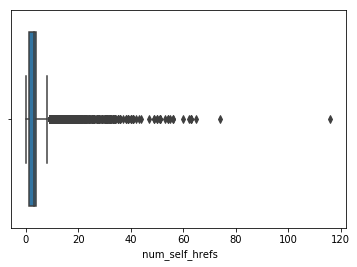

 num_imgs box plot


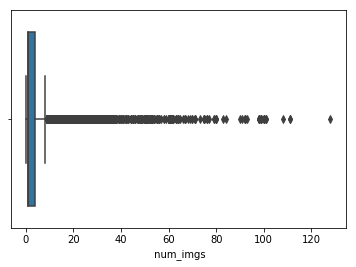

 num_videos box plot


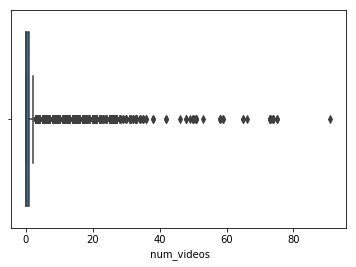

 average_token_length box plot


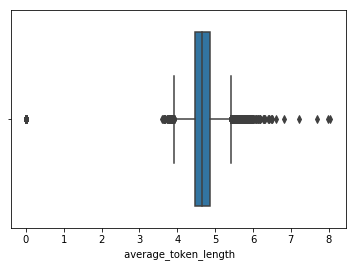

 num_keywords box plot


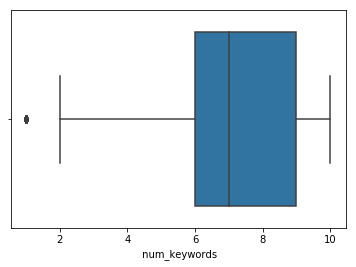

 data_channel_is_lifestyle box plot


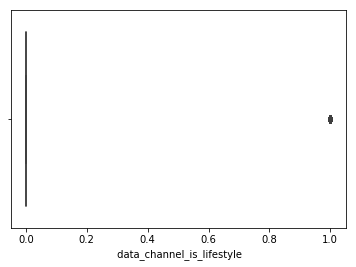

 data_channel_is_entertainment box plot


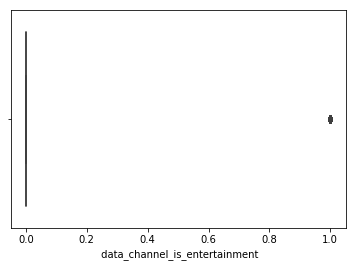

 data_channel_is_bus box plot


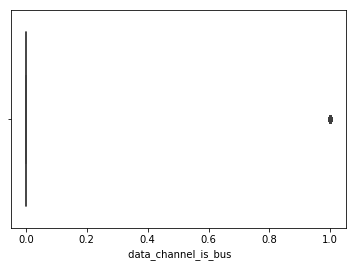

 data_channel_is_socmed box plot


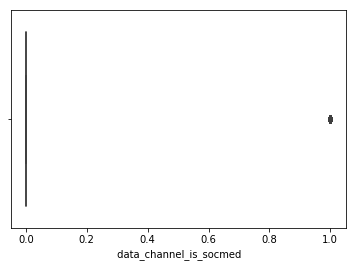

 data_channel_is_tech box plot


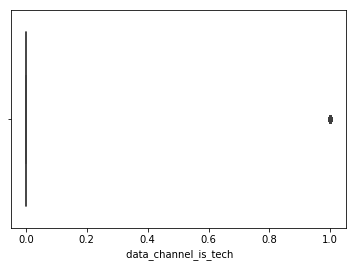

 data_channel_is_world box plot


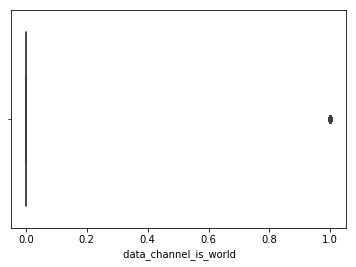

 kw_min_min box plot


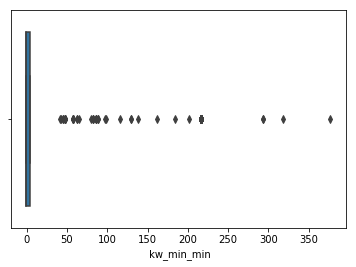

 kw_max_min box plot


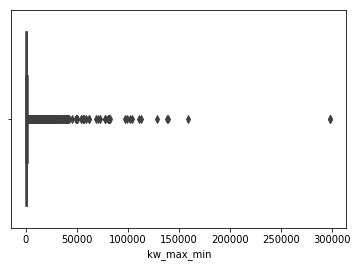

 kw_avg_min box plot


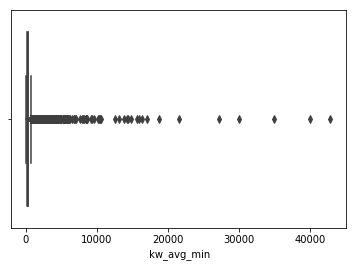

 kw_min_max box plot


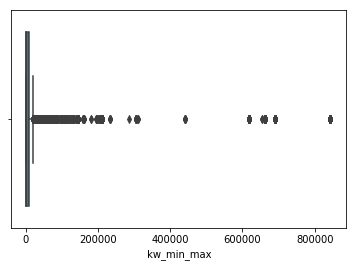

 kw_max_max box plot


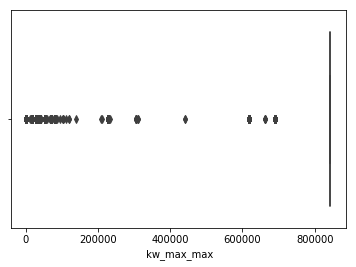

 kw_avg_max box plot


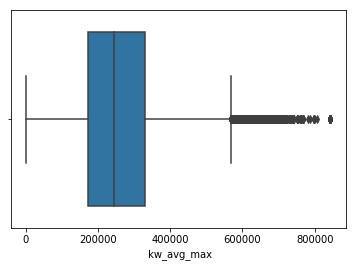

 kw_min_avg box plot


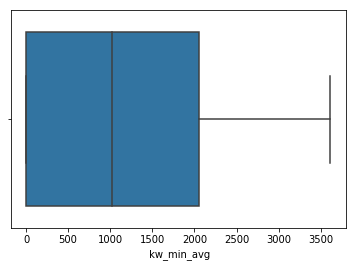

 kw_max_avg box plot


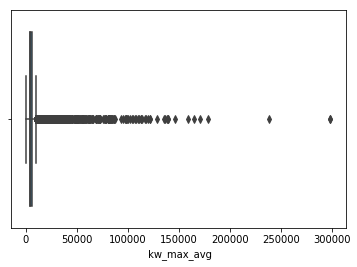

 kw_avg_avg box plot


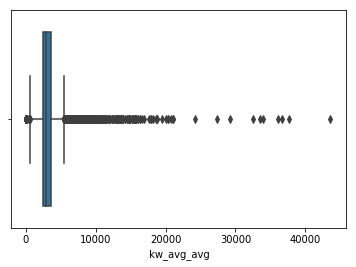

 self_reference_min_shares box plot


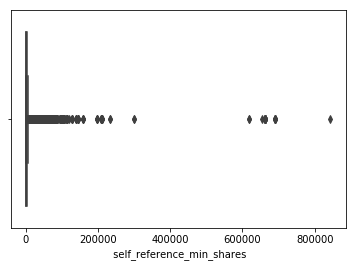

 self_reference_max_shares box plot


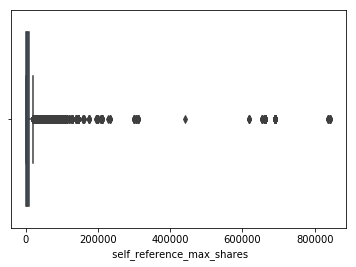

 self_reference_avg_sharess box plot


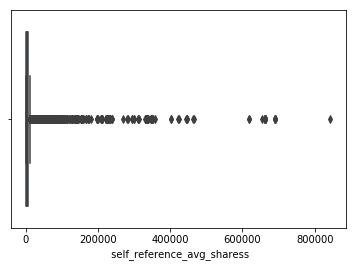

 weekday_is_monday box plot


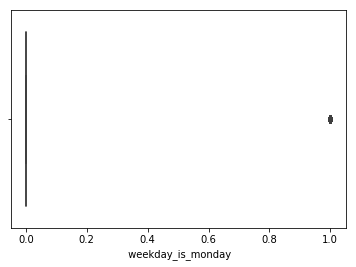

 weekday_is_tuesday box plot


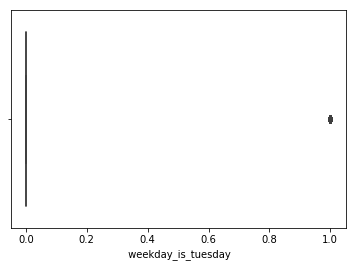

 weekday_is_wednesday box plot


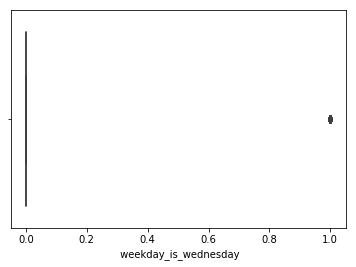

 weekday_is_thursday box plot


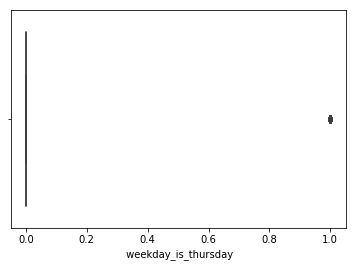

 weekday_is_friday box plot


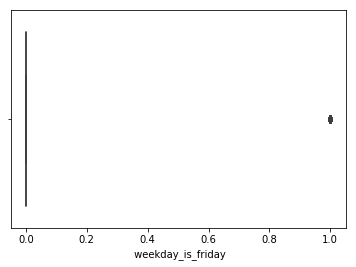

 weekday_is_saturday box plot


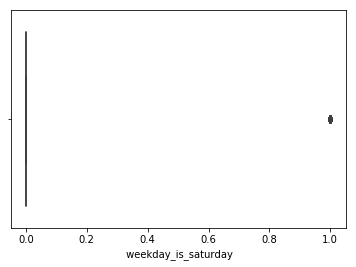

 weekday_is_sunday box plot


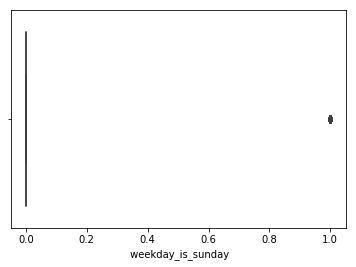

 is_weekend box plot


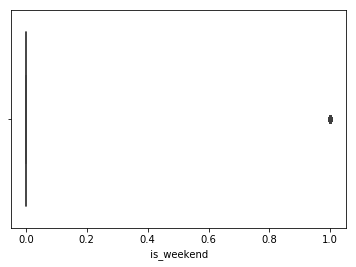

 LDA_00 box plot


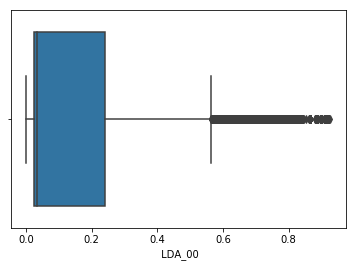

 LDA_01 box plot


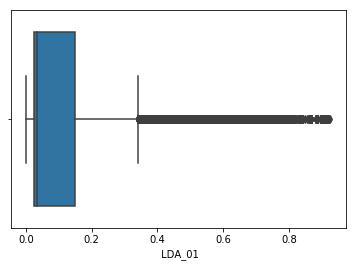

 LDA_02 box plot


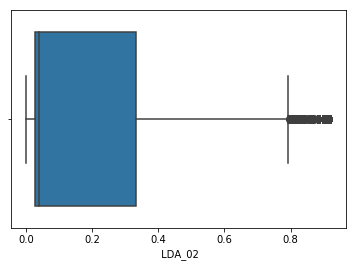

 LDA_03 box plot


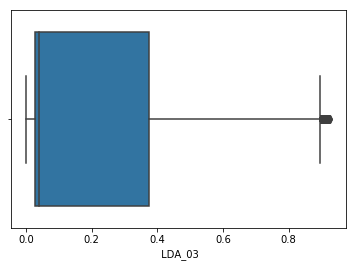

 LDA_04 box plot


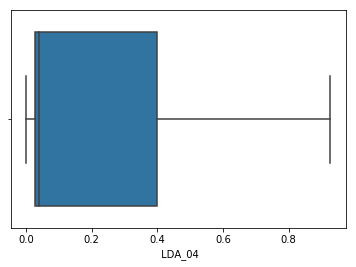

 global_subjectivity box plot


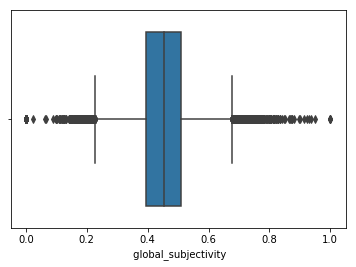

 global_sentiment_polarity box plot


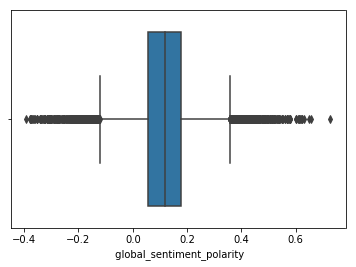

 global_rate_positive_words box plot


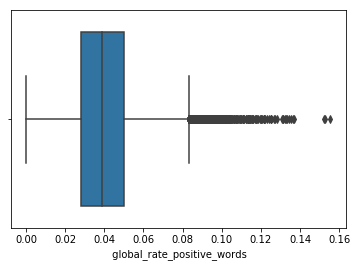

 global_rate_negative_words box plot


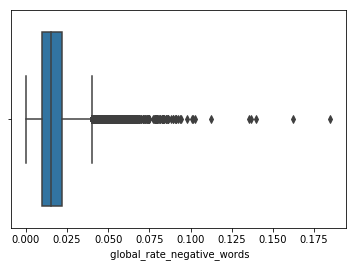

 rate_positive_words box plot


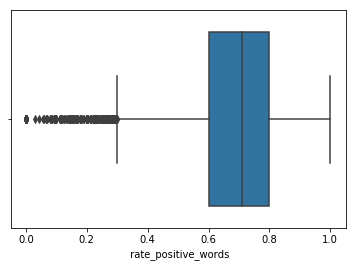

 rate_negative_words box plot


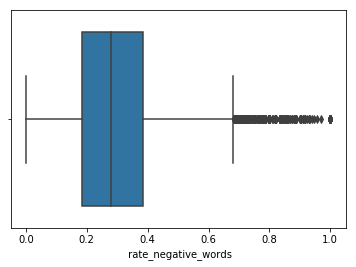

 avg_positive_polarity box plot


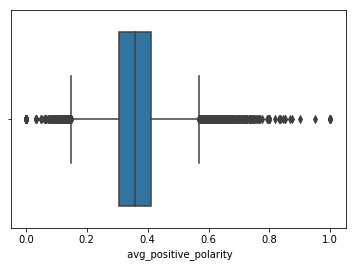

 min_positive_polarity box plot


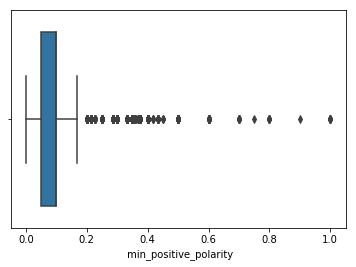

 max_positive_polarity box plot


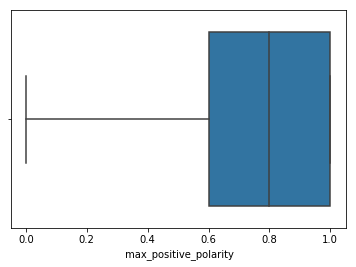

 avg_negative_polarity box plot


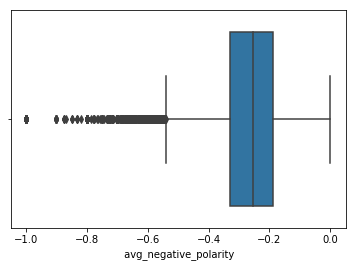

 min_negative_polarity box plot


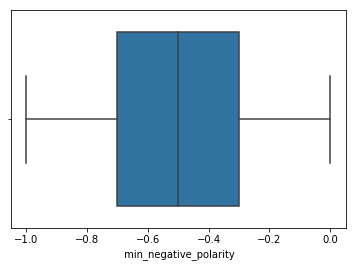

 max_negative_polarity box plot


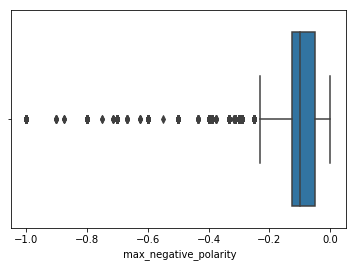

 title_subjectivity box plot


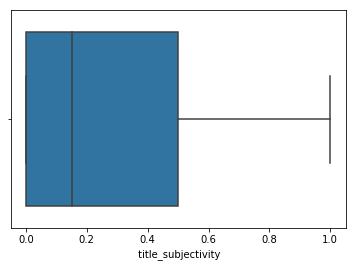

 title_sentiment_polarity box plot


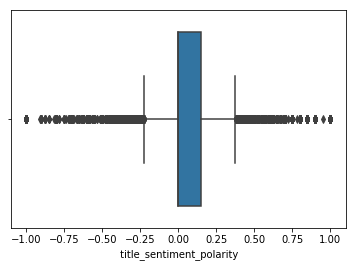

 abs_title_subjectivity box plot


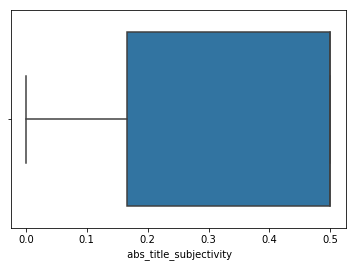

 abs_title_sentiment_polarity box plot


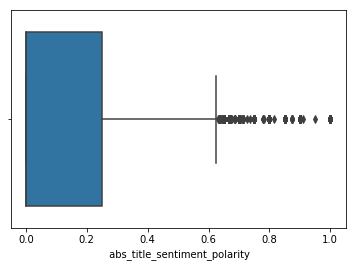

In [22]:
for i in X.columns:
    sns.boxplot(online[i])
    print(i,'box plot')
    plt.show()

In [23]:
for i in X.columns:
    q1 = online[i].quantile(0.25)
    q3 = online[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1-(1.5*iqr)
    ub = q3+(1.5*iqr)
    print("for column:"+ i,"lower bound",online[online[i]<lb].shape[0],"upper bound:",online[online[i]>ub].shape[0])

for column: timedelta lower bound 0 upper bound: 0
for column: n_tokens_title lower bound 34 upper bound: 122
for column: n_tokens_content lower bound 0 upper bound: 1933
for column: n_unique_tokens lower bound 1308 upper bound: 296
for column: n_non_stop_words lower bound 2826 upper bound: 1
for column: n_non_stop_unique_tokens lower bound 1591 upper bound: 142
for column: num_hrefs lower bound 0 upper bound: 2169
for column: num_self_hrefs lower bound 0 upper bound: 2090
for column: num_imgs lower bound 0 upper bound: 7703
for column: num_videos lower bound 0 upper bound: 2946
for column: average_token_length lower bound 1236 upper bound: 445
for column: num_keywords lower bound 51 upper bound: 0
for column: data_channel_is_lifestyle lower bound 0 upper bound: 2099
for column: data_channel_is_entertainment lower bound 0 upper bound: 7057
for column: data_channel_is_bus lower bound 0 upper bound: 6258
for column: data_channel_is_socmed lower bound 0 upper bound: 2323
for column: data_

We calcuated IQR through formula q3-q1

then, tried to find out lower bound and upper bound for every column.

# Correlation

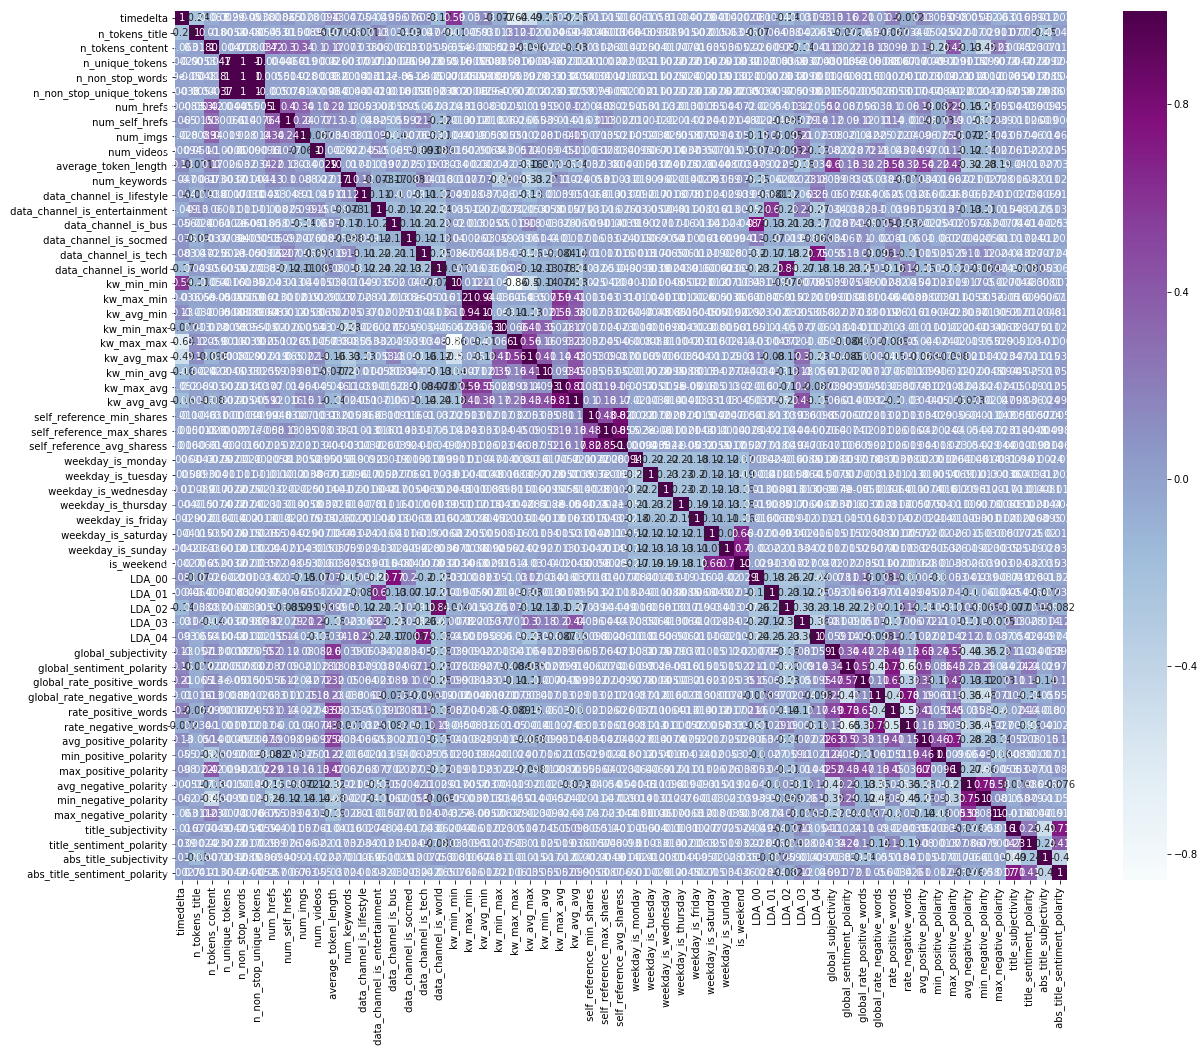

In [24]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(X.corr(),annot=True,cmap='BuPu',ax=ax)

In [25]:
X.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,0.098062,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,0.096446,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,0.097440,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231


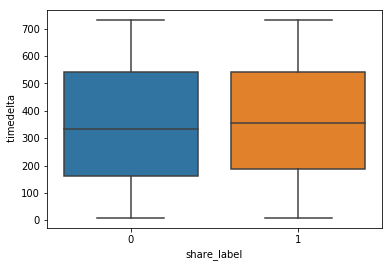

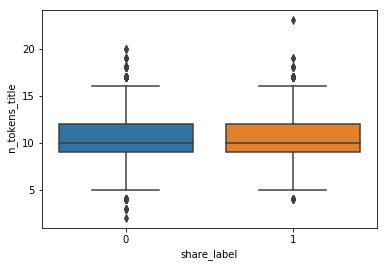

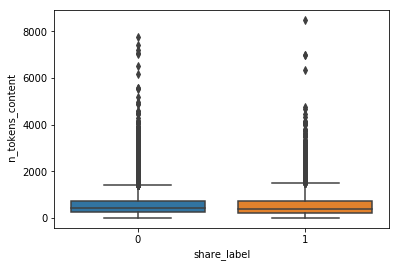

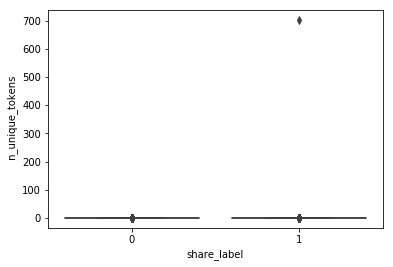

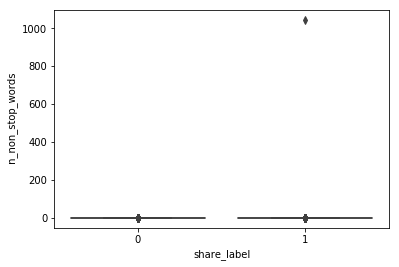

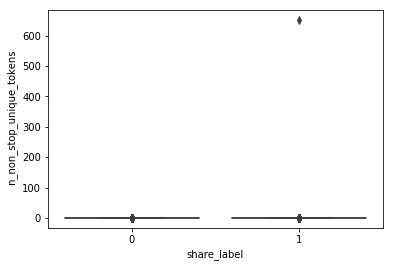

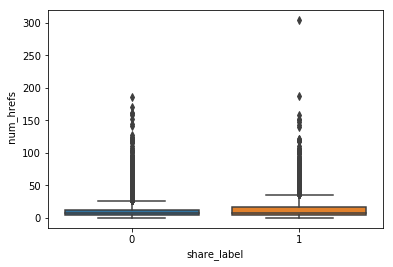

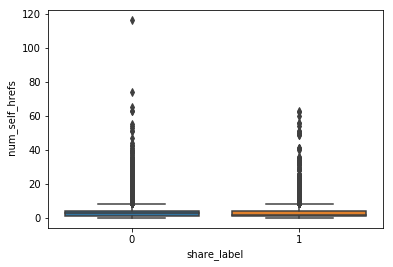

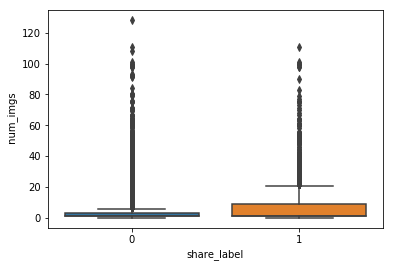

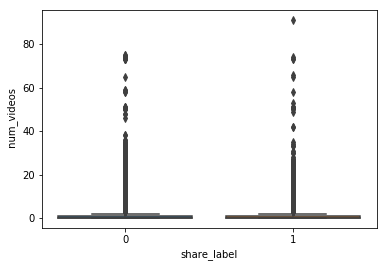

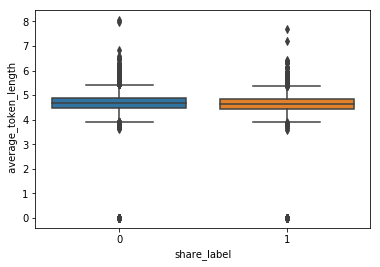

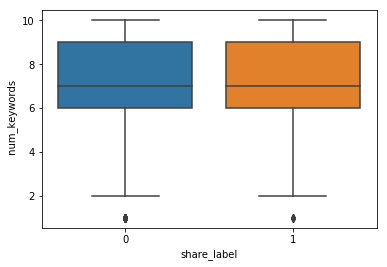

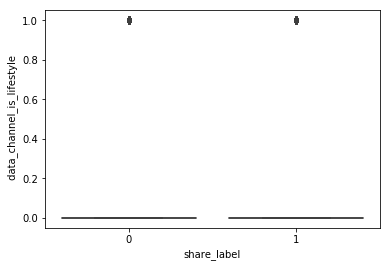

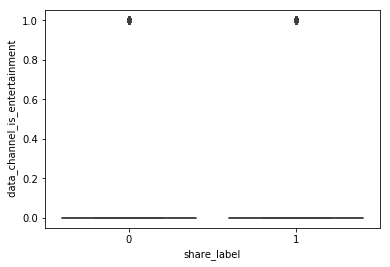

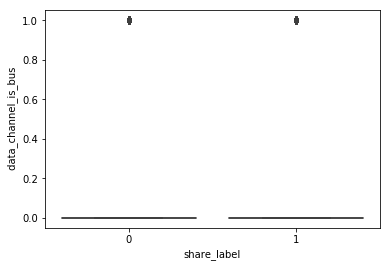

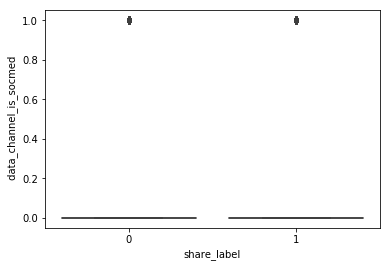

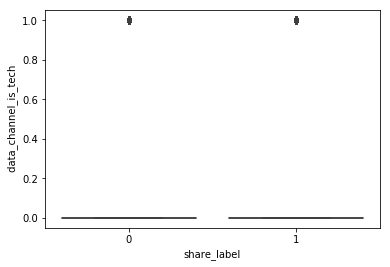

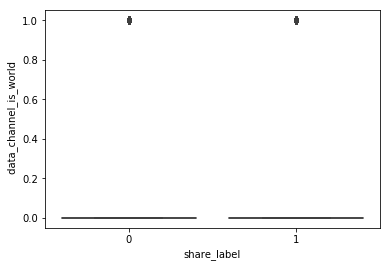

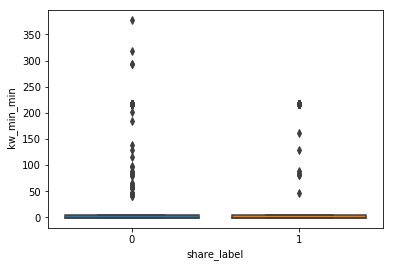

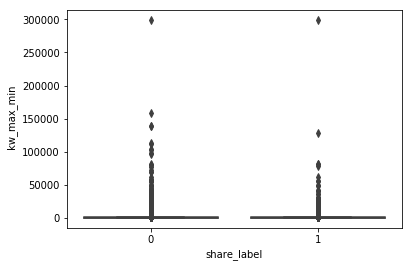

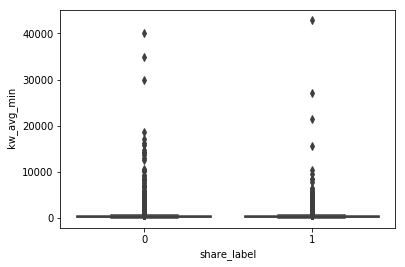

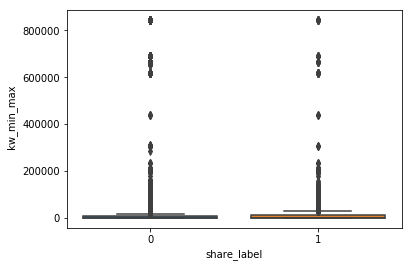

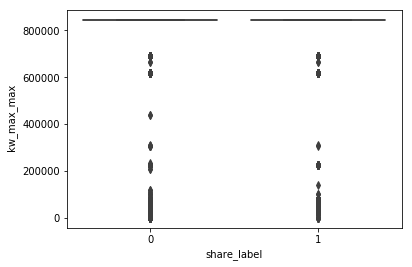

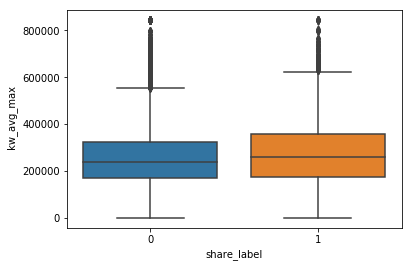

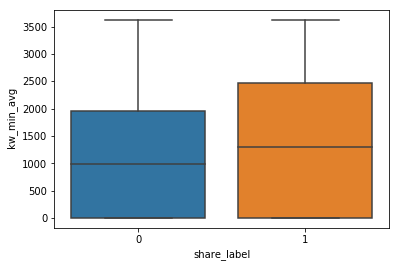

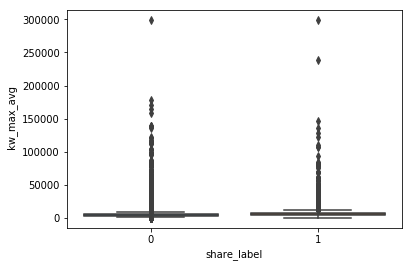

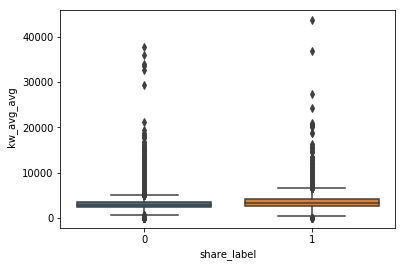

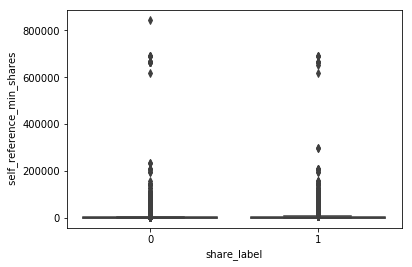

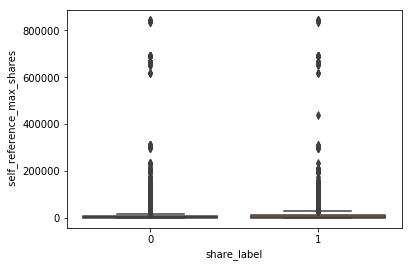

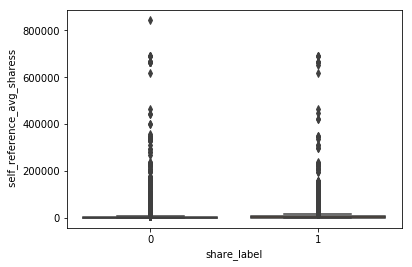

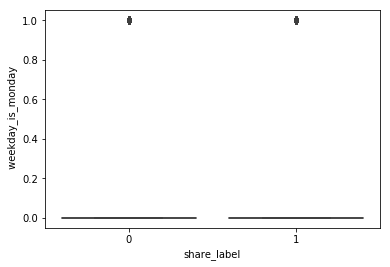

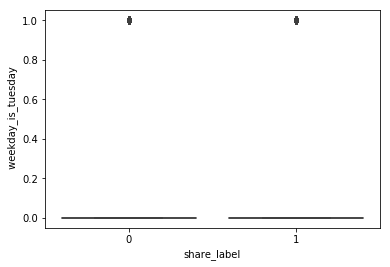

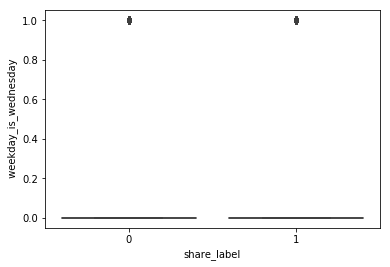

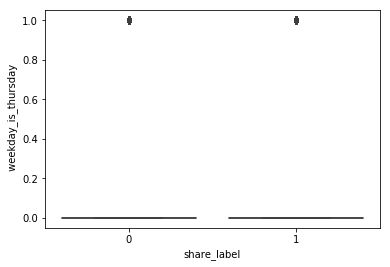

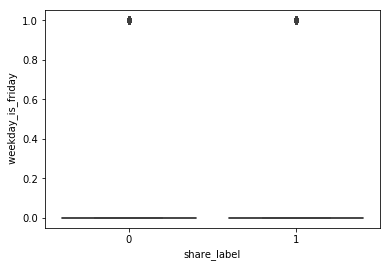

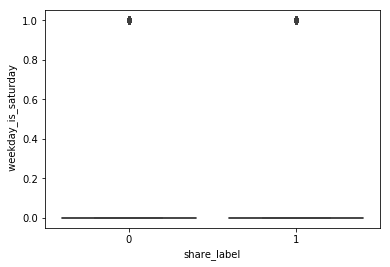

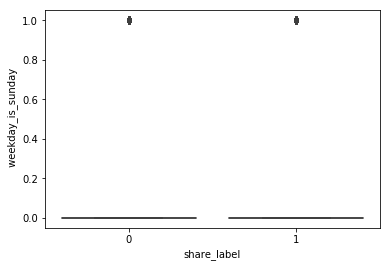

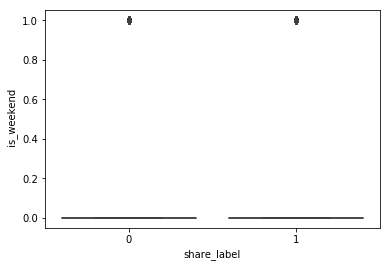

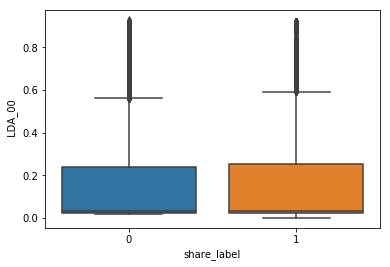

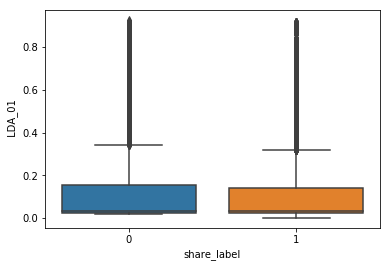

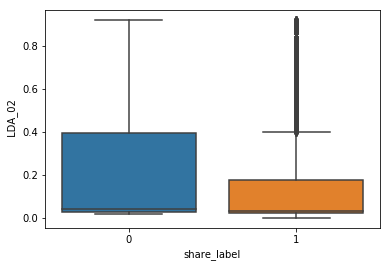

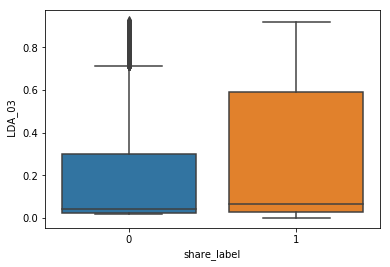

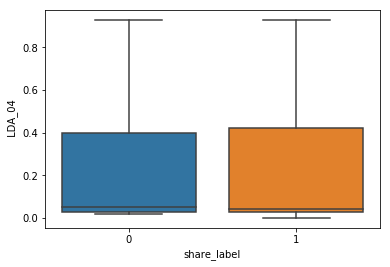

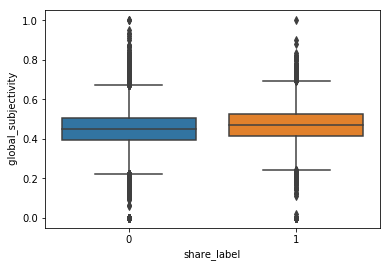

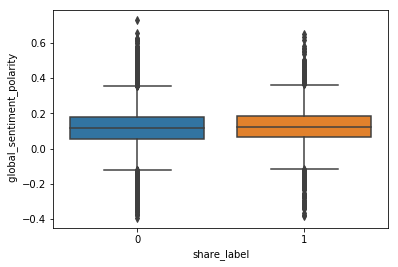

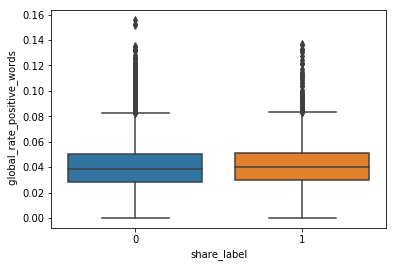

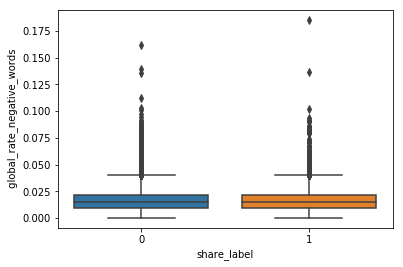

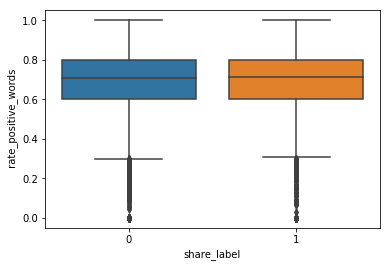

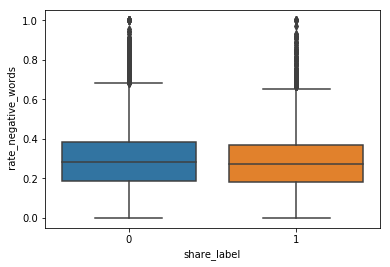

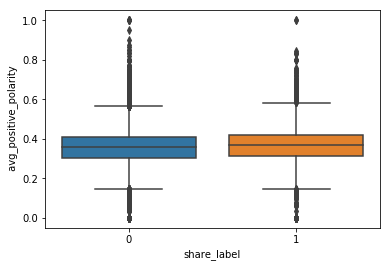

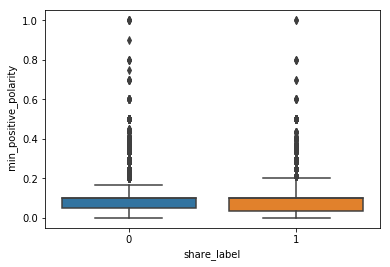

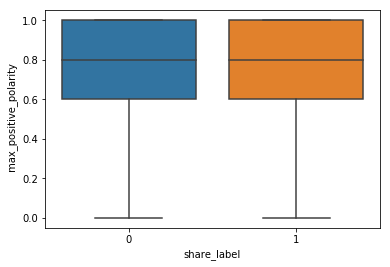

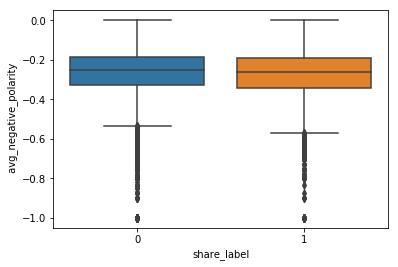

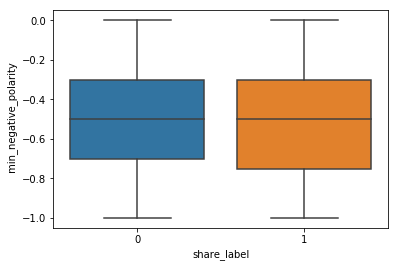

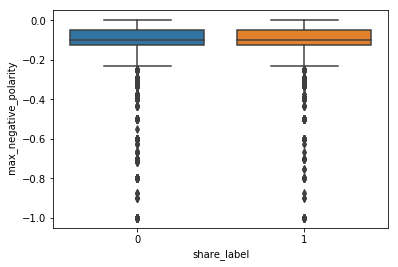

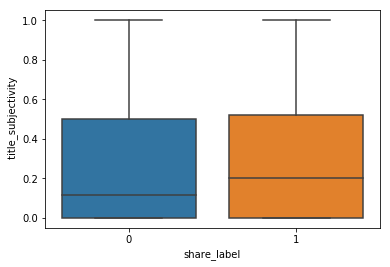

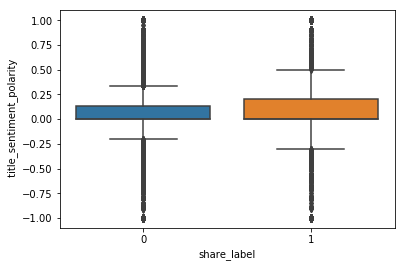

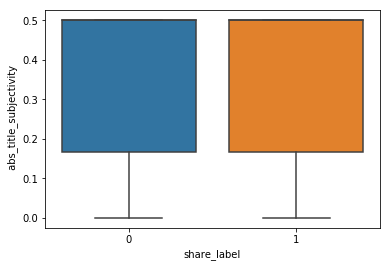

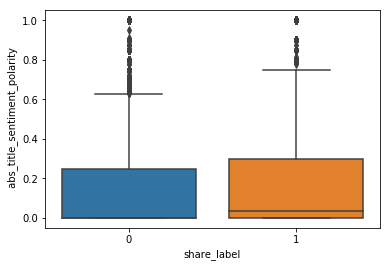

In [26]:
for cols in X.columns:
    sns.boxplot(online['share_label'],online[cols])
    plt.show()

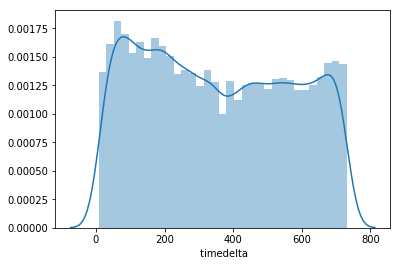

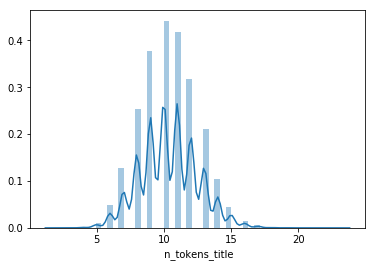

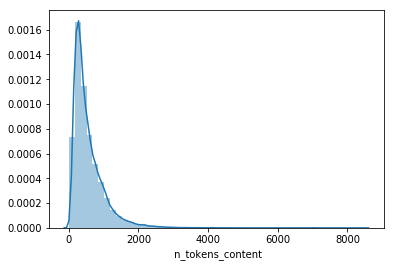

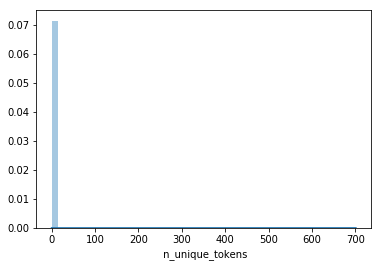

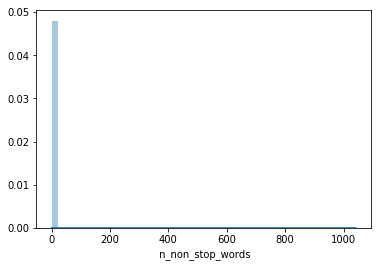

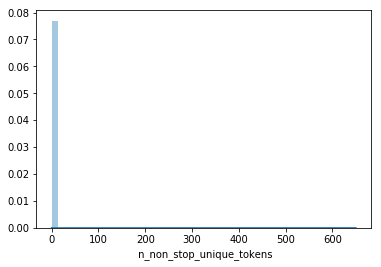

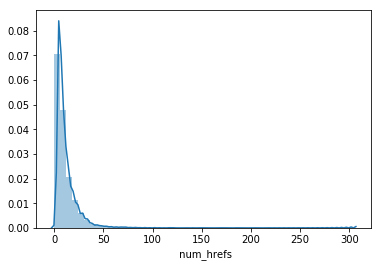

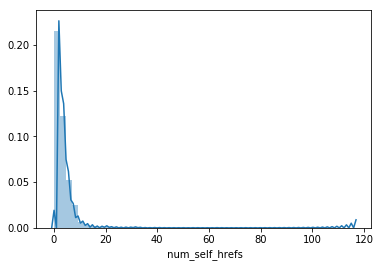

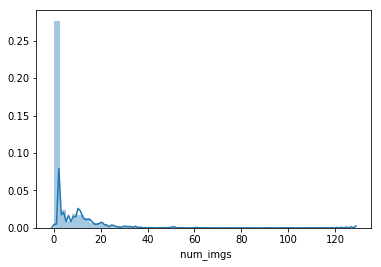

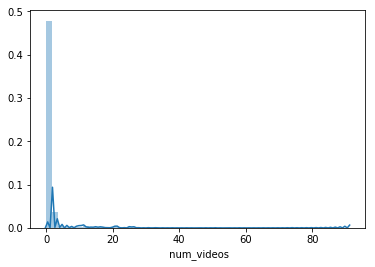

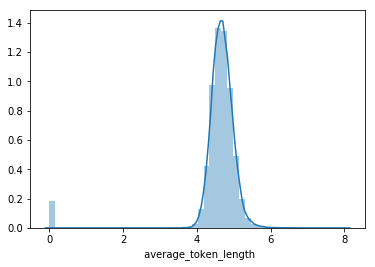

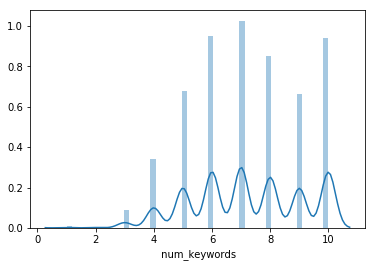

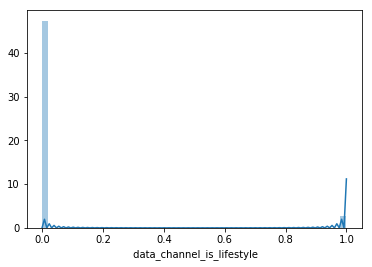

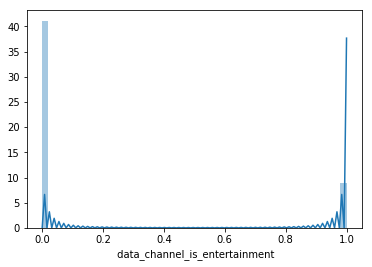

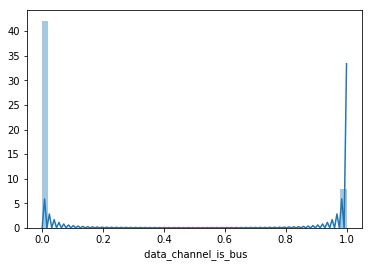

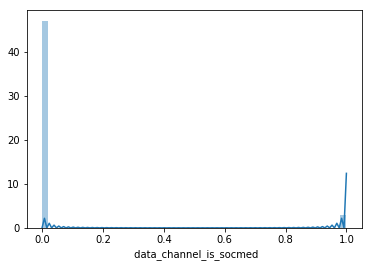

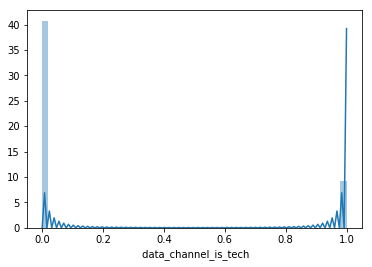

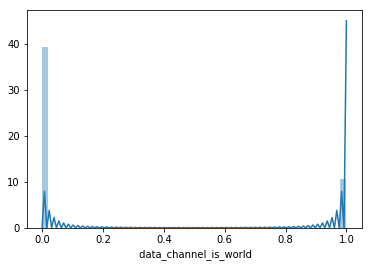

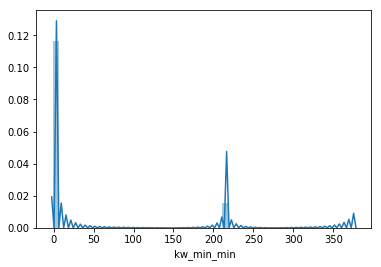

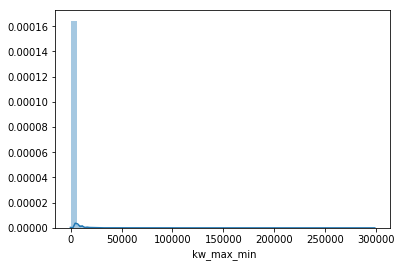

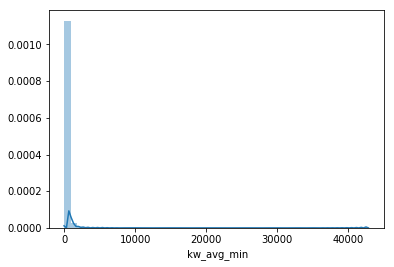

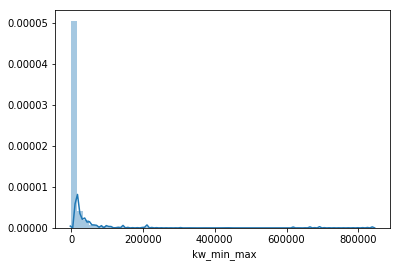

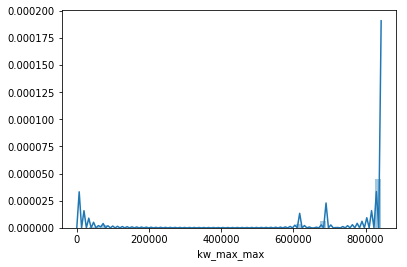

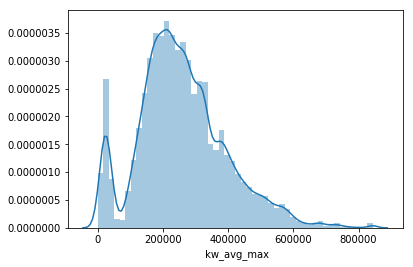

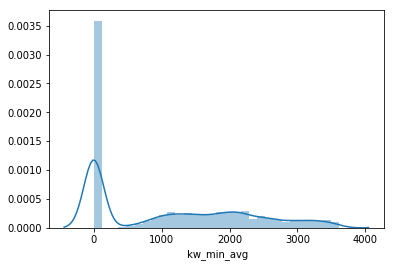

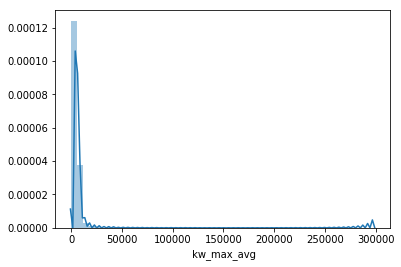

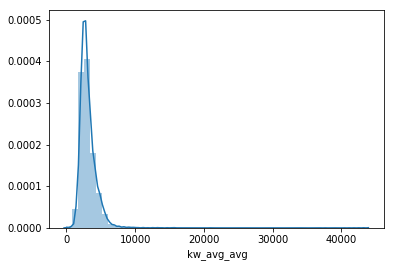

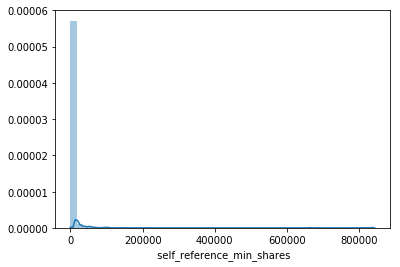

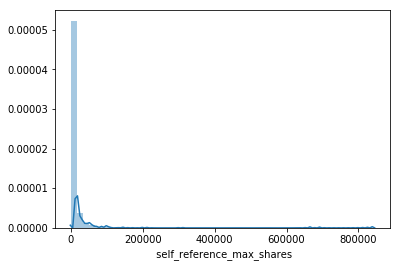

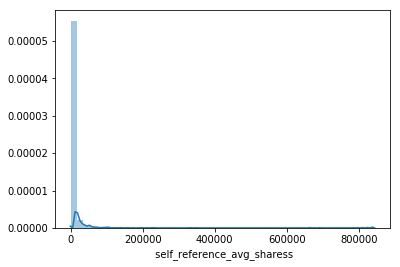

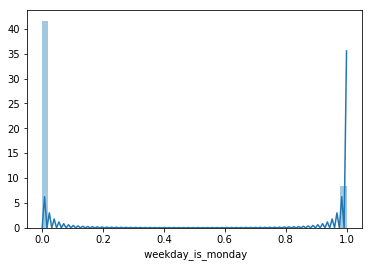

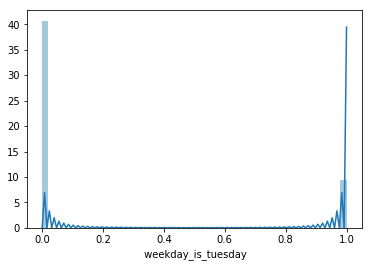

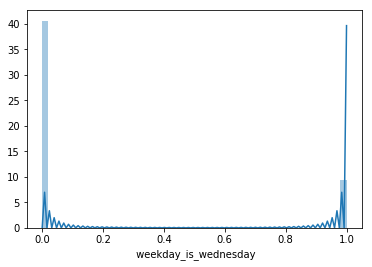

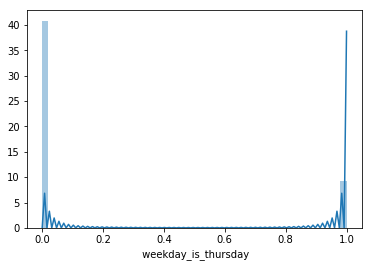

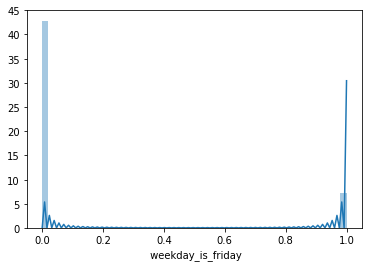

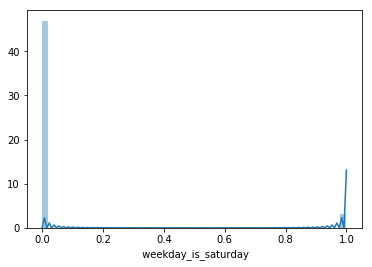

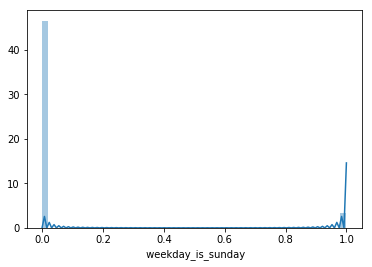

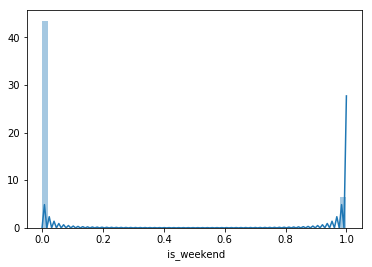

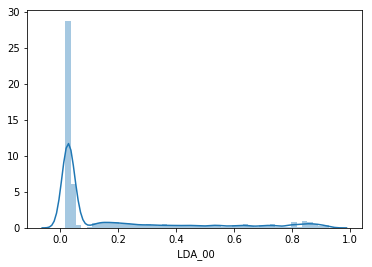

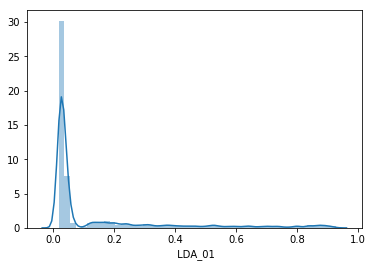

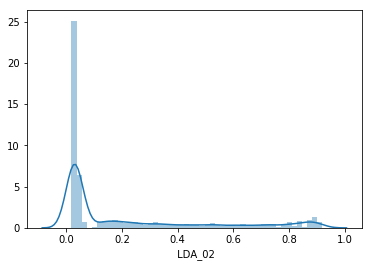

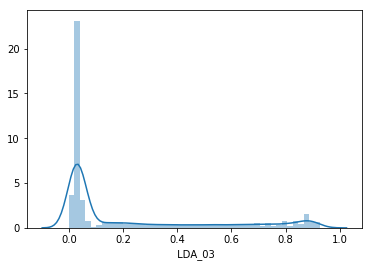

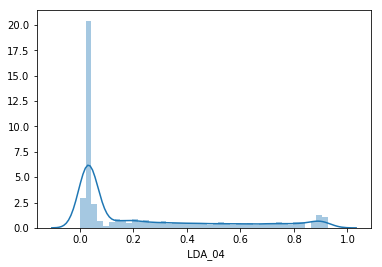

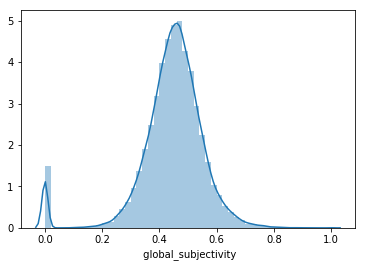

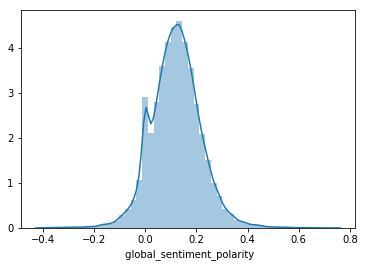

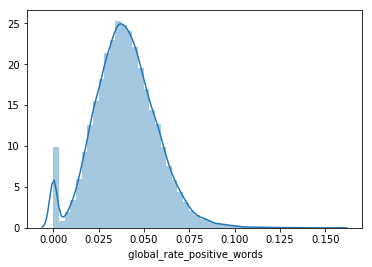

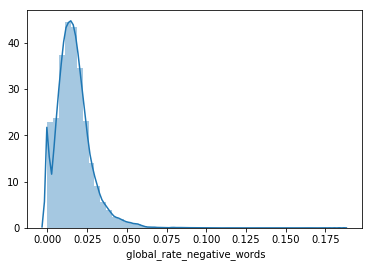

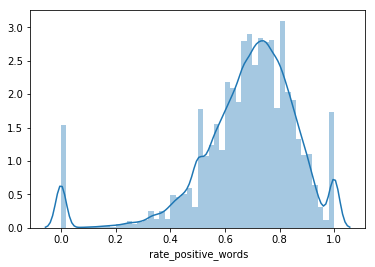

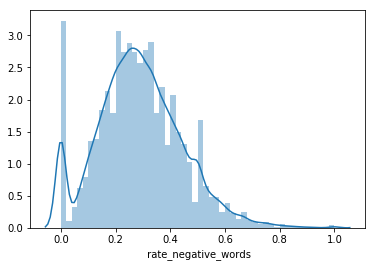

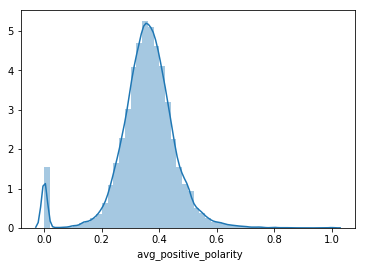

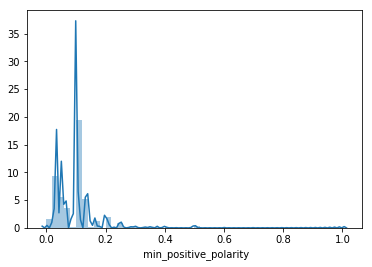

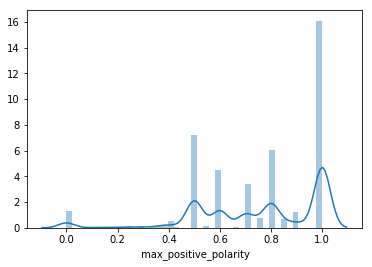

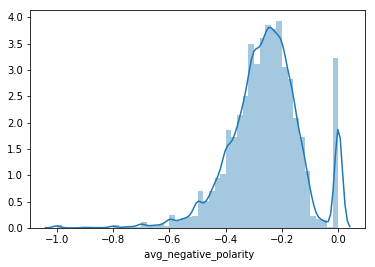

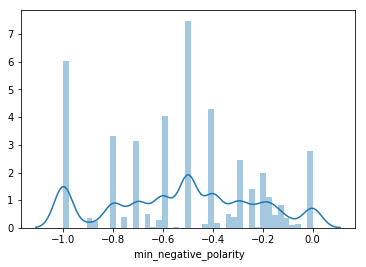

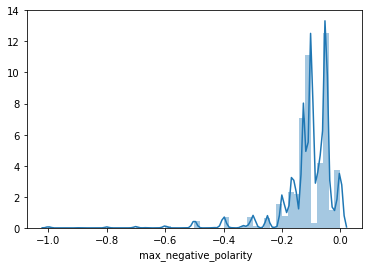

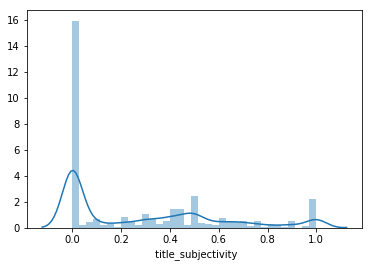

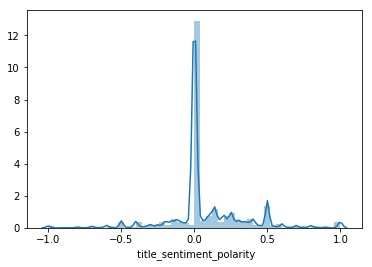

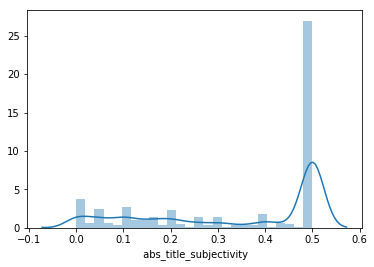

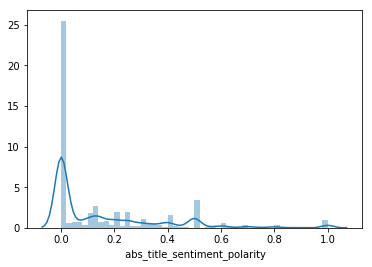

In [27]:
for cols in X.columns:
    sns.distplot(online[cols])
    plt.show()

# EDA Inference

Box plot is performed with respect to all columns and the target column.

Boxplot is used to identify the outliers. Outliers are responsible for skewness of the data. 

In the Box Plot, we can see there are a lot of outliers in the data.

Before performing BoxPlot, we have done IQR, UB and LB to identify how many outliers were there in each column.

We calculated IQR, then UB and LB. We identified the outliers.

Distribution plot helps us to identify how the data is distributed whether normally or skewed

Through the distplot we can see alot columns are right skewed, left skewed, bimodal and multimodal. 

The skewness in distribution is due to the presence of the outliers.

# Label Encoding / Get Dumies

The above code has been already done at the start of the exercise to build the model.

We have classified the Target column 'Shares' based on the mean. If the share value is less than mean, then it is classified as 0 and if it more than mean it is classified as 1

# Data Handling

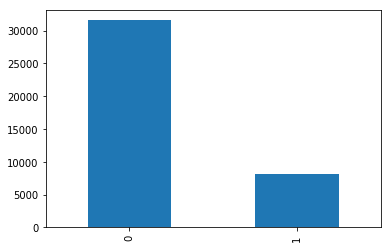

In [28]:
online['share_label'].value_counts().plot(kind='bar')

In [29]:
(online.share_label.sum()/len(online.share_label))*100

20.378871960447988

We can observe that the shares are in the ratio of 80% and 20%. But, it's a practical situation in the real time scenario

# Feature Selection

In [30]:
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)
model = sm.Logit(y_train,X_train_c).fit()
model.summary()

         Current function value: 0.468433
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            share_label   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27693
Method:                           MLE   Df Model:                           56
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.07153
Time:                        12:46:31   Log-Likelihood:                -12999.
converged:                      False   LL-Null:                       -14000.
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -441.8699   1.01e+06     -0.000      1.000   -1.98e+06    1.98e+06
 timedelta                         0.0007      0.000      6.252      0.000       0.000       0.001
 n_tokens_title                    0.0215      0.008      2.740      0.006       0.006       0.037
 n_tokens_content                8.23e-05   5.71e-05      1.441      0.150   -2.97e-05       0.000
 n_unique_tokens                   0.1387      0.506      0.274      0.784      -0.852       1.129
 n_non_stop_words                  0.4109      2.015      0.204      0.838      -3.538       4.359
 n_non_stop_unique_tokens          0.0029      0.428      0.007      0.995      -0.835       0.841
 num_hrefs                         0.0072      0.002      4.376      0.000       0.004       0.010
 num_self_hrefs                   -0.0246      0.005     -5.212      0.000      -0.034      -0.015
 num_imgs                          0.0071      0.002      3.200      0.001       0.003       0.011
 num_videos                        0.0067      0.004      1.787      0.074      -0.001       0.014
 average_token_length             -0.2351      0.065     -3.611      0.000      -0.363      -0.108
 num_keywords                      0.0476      0.010      4.727      0.000       0.028       0.067
 data_channel_is_lifestyle        -0.1474      0.098     -1.503      0.133      -0.340       0.045
 data_channel_is_entertainment    -0.2691      0.065     -4.128      0.000      -0.397      -0.141
 data_channel_is_bus              -0.4614      0.098     -4.698      0.000      -0.654      -0.269
 data_channel_is_socmed            0.3218      0.091      3.543      0.000       0.144       0.500
 data_channel_is_tech              0.2609      0.095      2.759      0.006       0.076       0.446
 data_channel_is_world            -0.0432      0.101     -0.427      0.669      -0.241       0.155
 kw_min_min                        0.0006      0.000      1.406      0.160      -0.000       0.001
 kw_max_min                     3.927e-05   1.54e-05      2.550      0.011    9.09e-06    6.95e-05
 kw_avg_min                       -0.0003   8.95e-05     -3.730      0.000      -0.001      -0.000
 kw_min_max                     -7.95e-07   3.42e-07     -2.326      0.020   -1.46e-06   -1.25e-07
 kw_max_max                     1.391e-08   1.58e-07      0.088      0.930   -2.95e-07    3.23e-07
 kw_avg_max                    -3.533e-07   2.21e-07     -1.601      0.109   -7.86e-07    7.92e-08
 kw_min_avg                       -0.0001   1.95e-05     -5.321      0.000      -0.000   -6.55e-05
 kw_max_avg                    -9.011e-05      7e-06    -12.880      0.000      -0.000   -7.64e-05
 kw_avg_avg                        0.0007   3.93e-05     17.655      0.000       0.001       0.001
 self_reference_min_shares      2.107e-06    1.8e-06      1.172      0.241   -1.42e-06    5.63e-06
 self_reference_max_shares      4.116e-07   9.11e-07      0.452      0.65

In [31]:
#Backward Selection
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    x_1 = X[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_feature_BE = cols
print(selected_feature_BE)

[' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' min_positive_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity']


In [32]:
X = online[selected_feature_BE]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
print("train accuracy",model.score(X_train,y_train))
print("test accuracy",model.score(X_test,y_test))

train accuracy 0.7966126126126126
test accuracy 0.7937615604506474


 Over Fitting model since the train accuracy is more than test accuracy

# Logistic,Decision Tree, KNN, Naive Bayes

# Logistic Regression

In [74]:
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],'penalty':['l1','l2']}]

In [79]:
gs = GridSearchCV(log_reg,param_grid,cv=3,scoring='accuracy')
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
gs.best_params_

{'C': 1.1, 'penalty': 'l1'}

In [81]:
gs.best_score_

0.7965045045045045

In [82]:
lr = LogisticRegression(**gs.best_params_) 
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)
lr_train=model.score(X_train,y_train)
lr_test=accuracy_score(y_test,y_pred)
lr_precision = metrics.precision_score(y_test,y_pred)
lr_recall = metrics.recall_score(y_test,y_pred)
lr_f1 = metrics.f1_score(y_test,y_pred)

# Decision Tree 

In [83]:
dt = DecisionTreeClassifier()

In [84]:
params = {
    'max_depth' : np.arange(3,10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : [5,10,20,100],
    'min_samples_split' : [2,5,10,20]
}

In [85]:
gs = GridSearchCV(dt,params,cv=3,scoring='accuracy')
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [5, 10, 20, 100], 'min_samples_split': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_train = dt.score(X_train,y_train)
dt_test = accuracy_score(y_test,y_pred_dt)
dt_precision = metrics.precision_score(y_test,y_pred_dt)
dt_recall = metrics.recall_score(y_test,y_pred_dt)
dt_auc = metrics.roc_auc_score(y_test,y_pred_dt)
dt_f1 = metrics.f1_score(y_test,y_pred_dt)

# KNN

In [87]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf = knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
knn_train=model.score(X_train,y_train)
knn_test=accuracy_score(y_test,y_pred_knn)
knn_precision = metrics.precision_score(y_test,y_pred_knn)
knn_recall = metrics.recall_score(y_test,y_pred_knn)
knn_f1 = metrics.f1_score(y_test,y_pred_knn)

# Naive Bayes

In [88]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = knn_clf.predict(X_test)
nb_train = nb.score(X_train,y_train)
nb_test = accuracy_score(y_test,y_pred_nb)
nb_precision = metrics.precision_score(y_test,y_pred_nb)
nb_recall = metrics.recall_score(y_test,y_pred_nb)
nb_f1 = metrics.f1_score(y_test,y_pred_nb)

In [89]:
metrices = {'accuray':[lr_train, dt_train, knn_train, nb_train],
           'Precision':[lr_precision, dt_precision, knn_precision, nb_precision],
           'recall':[lr_recall, dt_recall, knn_recall, nb_recall],
           'test_score':[lr_test, dt_test, knn_test, nb_test],
            'f1_score':[lr_f1,dt_f1,knn_f1,nb_f1]
           }

In [90]:
metrics_df = pd.DataFrame(metrices, index = ['logistic','Decision Tree','KNN','NaiveBayes'])
metrics_df

,accuray,Precision,recall,test_score,f1_score
logistic,0.796324,0.522267,0.052739,0.795275,0.095804
Decision Tree,0.797009,0.000000,0.000000,0.794350,0.000000
KNN,0.796324,0.318230,0.123467,0.765344,0.177909
NaiveBayes,0.783315,0.318230,0.123467,0.765344,0.177909


We can observe that accuracy of KNN,Decision Tree, KNN are similar and bit higher than NaiveBayes.

Precision qnd Recall is also similar for all the models.

Considering f1_score, we can say Logistic Regression or Decision Tree is better among all the models.



# Ensembling Techniques

In [91]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [92]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=3, max_leaf_nodes=5)
rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_train = dt.score(X_train,y_train)
rf_test = accuracy_score(y_test,y_pred_rf)
rf_precision = metrics.precision_score(y_test,y_pred_rf)
rf_recall = metrics.recall_score(y_test,y_pred_rf)
rf_f1 = metrics.f1_score(y_test,y_pred_rf)

# Bagging Classifier  

In [97]:
dt_bg = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
bg_clf = BaggingClassifier(base_estimator=dt_bg,n_estimators = 100, random_state = 42)
bg_clf = bg_clf.fit(X_train, y_train)
y_pred_bg_clf = rf.predict(X_test)
bg_clf_train = dt.score(X_train,y_train)
bg_clf_test = accuracy_score(y_test,y_pred_bg_clf)
bg_clf_precision = metrics.precision_score(y_test,y_pred_bg_clf)
bg_clf_recall = metrics.recall_score(y_test,y_pred_bg_clf)
bg_clf_f1 = metrics.f1_score(y_test,y_pred_bg_clf)

In [109]:
metrices1 = {'accuray':[rf_train,bg_clf_train],
           'Precision':[rf_precision,bg_clf_precision],
           'recall':[rf_recall,bg_clf_recall],
           'test_score':[rf_test,bg_clf_test],
            'f1_score':[rf_f1,bg_clf_f1]
           }

In [110]:
metrics_df2= pd.DataFrame(metrices1, index = ['Random Forest','Decision Tree Bagging'])
metrics_df2

,accuray,Precision,recall,test_score,f1_score
Random Forest,0.797009,0.0,0.0,0.79435,0.0
Decision Tree Bagging,0.797009,0.0,0.0,0.79435,0.0


In [111]:
Final_Model_Score = pd.concat((metrics_df,metrics_df2),axis=0)
Final_Model_Score

,accuray,Precision,recall,test_score,f1_score
logistic,0.796324,0.522267,0.052739,0.795275,0.095804
Decision Tree,0.797009,0.000000,0.000000,0.794350,0.000000
KNN,0.796324,0.318230,0.123467,0.765344,0.177909
NaiveBayes,0.783315,0.318230,0.123467,0.765344,0.177909
Random Forest,0.797009,0.000000,0.000000,0.794350,0.000000
Decision Tree Bagging,0.797009,0.000000,0.000000,0.794350,0.000000
